## Objectives

The objective of this project is to implement an object recognizer capable of processing a real-time video source.

## Prerequisites

You will need to have the libraries that are imported below installed.

## Environment Setup


In [43]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage import transform
from IPython import display
from PIL import Image, ImageDraw, ImageFont
import cv2

import tensorflow as tf
from ultralytics import YOLO

import warnings
warnings.filterwarnings("ignore")

from utils_w7 import dibujar_img, dibujar_imgs, reconoce_imagen



## Capture images with Webcam


In [44]:
# Conecting with the main camera of the laptop
cam = cv2.VideoCapture(0)

Once connected, we can read a frame from the camera with read. This function will return a return code 'ret' and the frame:

In [45]:
#Read one frame 
ret, frame = cam.read()

In [46]:
#Displays the shape of the frame
frame.shape

(480, 640, 3)

Una vez capturado el frame podemos parar de capturar con la webcam con:

In [47]:
cam.release()

Veamos ahora el frame que hemos obtenido:

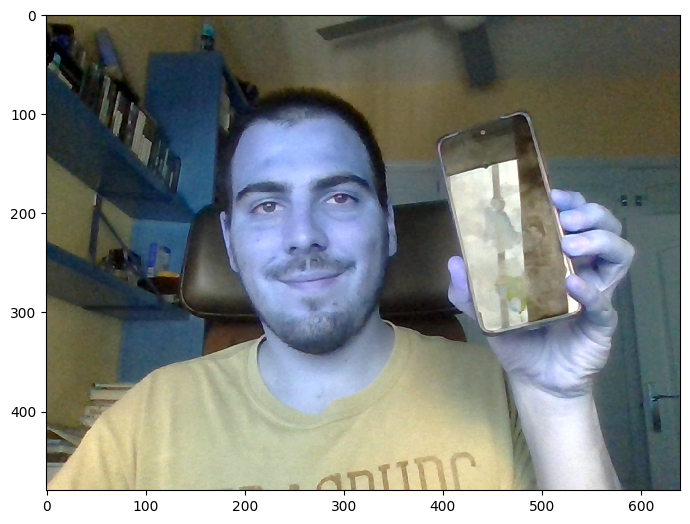

In [48]:
dibujar_img(frame)

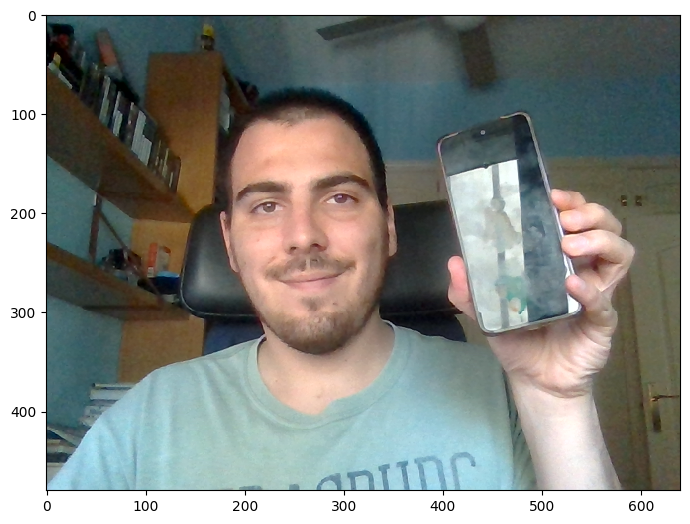

In [49]:
# OpenCV reads images in BGR (Blue, Green, Red) channel order by default.
# To display the image correctly using other libraries like Matplotlib,
# we need to convert it to RGB (Red, Green, Blue) format.
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
dibujar_img(frame_rgb)

### Displayin frames sequently

1. Instantiate the model
2. Loop to display frames sequentially

In [50]:
# Load a pretrained YOLOv8n model
#You can select the model that you prefer at these point
model = YOLO("./weights/yolov8l.pt")


0: 480x640 1 person, 1 cell phone, 404.2ms
Speed: 0.0ms preprocess, 404.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


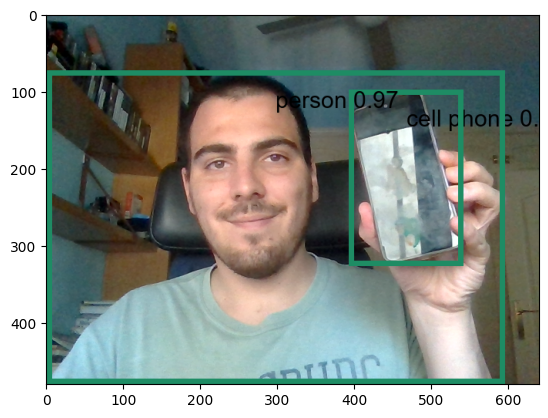

In [51]:
#Now we are going to predict the last frame
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Process the image using `reconoce_imagen`, assuming it returns a predicted image
predicted_image = reconoce_imagen(np.asarray(frame_rgb), 0.85, model)

#Displays de image with the box
im = plt.imshow(predicted_image, animated=True)

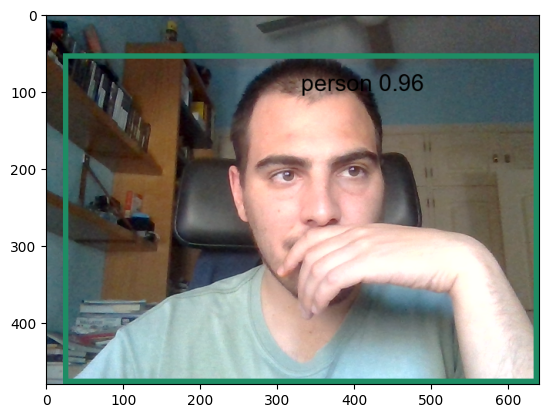


Video sequence stopped:
	


In [9]:

# Initialize the camera
cam = cv2.VideoCapture(0)

try:
    while True:
        # Capture frame-by-frame
        ret, frame = cam.read()
        
        if not ret:
            raise Exception("Cannot capture frame.")
        
        # Convert frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the image using `reconoce_imagen`, assuming it returns a predicted image
        predicted_image = reconoce_imagen(np.asarray(frame_rgb), 0.85, model)
        
        # Clear previous output before new content
        display.clear_output(wait=True)
        
        # Display the image
        im = plt.imshow(predicted_image, animated=True)
                    
        plt.show()
    
except KeyboardInterrupt as ex:
    # Stop video stream if we interrupt the loop
    cam.release()
    print("Video sequence stopped:\n\t{}".format(ex))
except Exception as e:
    cam.release()
    print("Video sequence stopped:\n\t{}".format(e))
